<a href="https://colab.research.google.com/github/androbaza/IP-algos/blob/main/1_FFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt

from numpy.fft import fft2, ifft2, fftshift, ifftshift

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(512, 512)


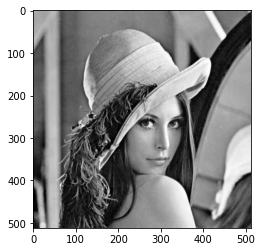

In [3]:
im = imread("/content/drive/MyDrive/samples/lena.jpg", pilmode="L")

plt.imshow(im, cmap="gray")
print(im.shape)
plt.show()

# Exercise 4: Filtering in Frequency Domain

The discrete Fourier transform (DFT) represents an image as a sum of sine and cosine waves with different frequencies and amplitudes. It is defined as:

$$
F(u,v) = \sum_{x=0}^{M}\sum_{y=0}^{N}f(x,y) \cdot e^{-2i\pi\cdot\left(\dfrac{u \cdot x}{M} + \dfrac{v \cdot y}{N} \right)} \;.
$$

This equation makes use of [Euler's formula](https://en.wikipedia.org/wiki/Euler%27s_formula) to represent the base function of the transform:

$$
e^{i \cdot x} = \mathrm{cos}(x) + i\cdot \mathrm{sin}(x) \;.
$$

The result is an array of complex numbers $F(u,v)$, each encoding the parameters of a wave with horizontal frequency $u$ and vertical frequency $v$. The absolute value of that number encodes the *amplitude* of that wave and its argument (the angle between the coefficients of the complex number) encodes the *phase* (offset) of the wave.

For a more extensive explanation, please refer to [this page](https://homepages.inf.ed.ac.uk/rbf/HIPR2/fourier.htm).

## Task 1 - (Fast) Fourier Transform

1. Use the methods `fft2`, `ifft2`, `fftshift`, `ifftshift` from `numpy.fft` to implement a function that performs the **Fourier Transformation** of an arbitrary image.

2. **Visualize** the amplitude and the phase of the resulting Fourier Representation. (*Hint: use <code>np.log</code> for visualizing the amplitude.*)

3. What does the visualization of the amplitude of the Fourier spectrum tell us about the image?

In [4]:
def DFT(im, shift=False):
    
    if im.dtype == np.uint8:
        im = im.astype(np.float) / 255
    
    I = fft2(im) # TODO: perform descrete FFT
    
    if shift:
        I = fftshift(I)
        # TODO: shift spectrum
        pass
    
    return I

def iDFT(I, shift=False, norm=False):
    
    if shift:
        I = ifftshift(I)
        # TODO: shift spectrum if wanted
        pass
    
    im = ifft2(I) # TODO: perform descrete inverse FFT
    
    if norm:
        im = (im.astype(np.float32) - im.min()) / (im.max() - im.min())
    
    return im

In [9]:
# I = DFT(im, shift=False)
# print(I)
print(np.abs(np.log(I)))

[[11.7414143   9.61590463  9.24374396 ...  8.40485943  9.24374396
   9.61590463]
 [ 8.91814308  9.66952576  9.19282554 ...  8.65325353  8.33331261
   8.63653301]
 [ 8.30129136  7.88760569  8.36361783 ...  8.64153958  8.7531954
   8.37359382]
 ...
 [ 7.99723752  8.62015275  8.44784829 ...  8.56118666  8.31905562
   8.23932893]
 [ 8.30129136  8.37359382  8.7531954  ...  8.75528842  8.36361783
   7.88760569]
 [ 8.91814308  8.63653301  8.33331261 ...  9.43043521  9.19282554
   9.66952576]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


False


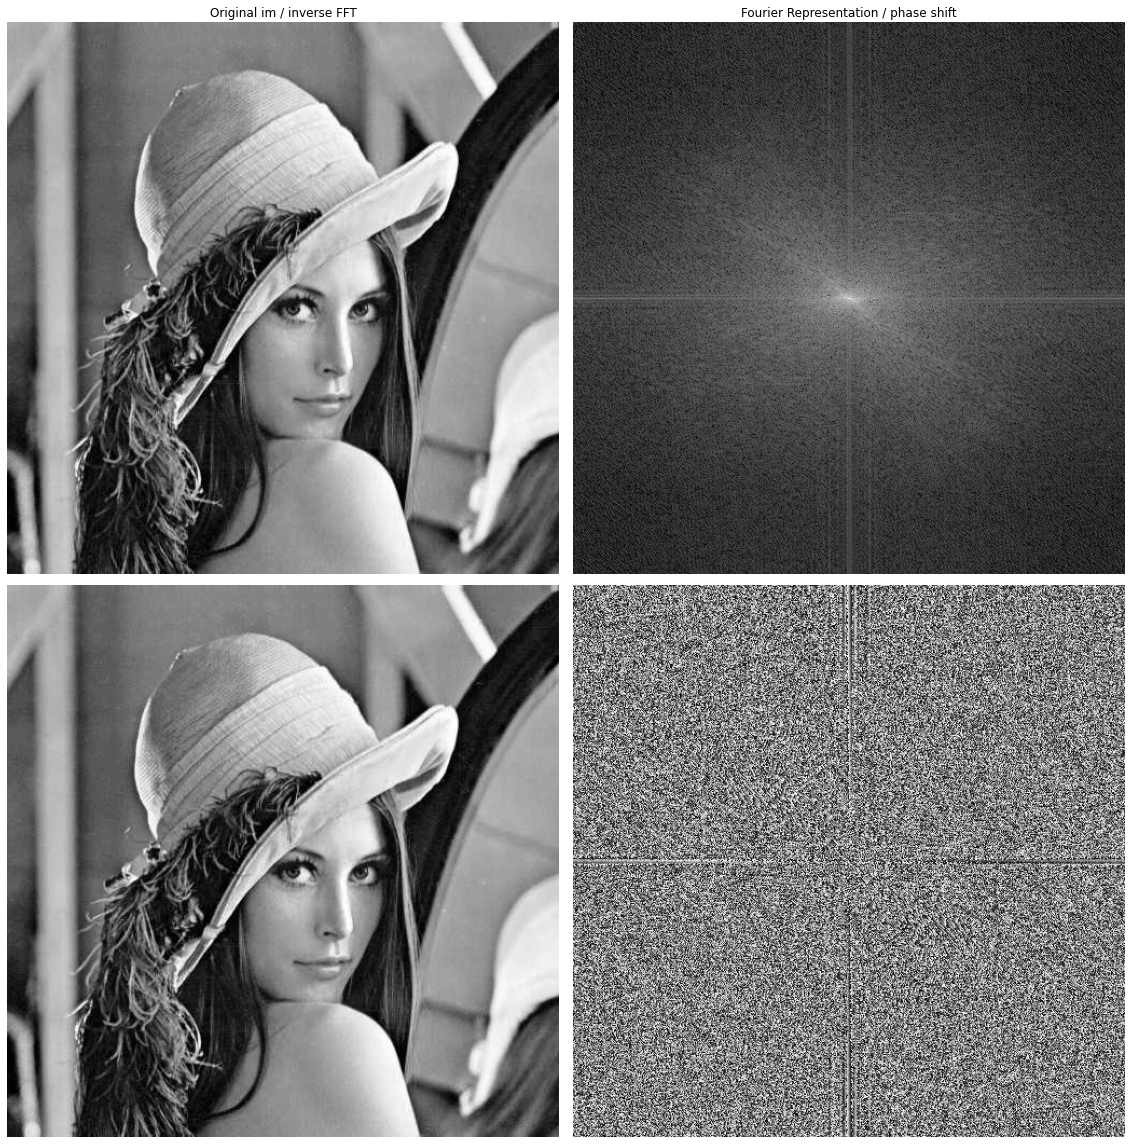

In [29]:
I = DFT(im, shift=True)

new_I = I.copy()

new_im = np.abs(iDFT(new_I, shift=True))

# TODO: check whether new_im and im are same
print(np.all(im==255*new_im))

fig, axs = plt.subplots(2, 2, figsize=(16,16))
for ax in axs.ravel():
  ax.axis('off')

axs[0,0].set_title('Original im / inverse FFT')
axs[0,1].set_title('Fourier Representation / phase shift')

axs[0,0].imshow(im, cmap=plt.cm.gray)
axs[1,0].imshow(new_im, cmap=plt.cm.gray)
axs[0,1].imshow(np.abs(np.log(I)), cmap=plt.cm.gray)
axs[1,1].imshow(np.arctan(I.imag/I.real), cmap=plt.cm.gray)

fig.tight_layout()

# TODO: visualize im
# TODO: visualize new_im
# TODO: visualize amlitude of I
# TODO: visualize phase shifts of I

plt.show()

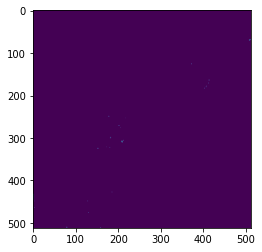

In [26]:
plt.imshow(np.abs(new_im*255 - im))

the images turned out to be almost 100% similar, a small difference in the center is visible probably due to flooring/ceiling somewhere. 